In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/processed/part-00000-cd530e15-795d-43aa-9731-3388b87f5dc7-c000.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (831, 12)


,ticker,date,open,high,low,close,volume,post_count,avg_score,total_score,avg_comments,max_score
0,AAPL,2020-09-29,111.697,112.436,110.739,111.243,102615780,0,0.0,0,0.0,0
1,AAPL,2020-09-30,110.958,114.345,110.788,112.918,146318692,0,0.0,0,0.0,0
2,AAPL,2020-10-01,114.704,114.782,112.937,113.885,119085817,0,0.0,0,0.0,0
3,AAPL,2020-10-02,110.089,112.486,109.429,110.219,148407508,0,0.0,0,0.0,0
4,AAPL,2020-10-05,111.078,113.746,110.720,113.597,108956998,0,0.0,0,0.0,0


In [4]:
df['close_next'] = df.groupby('ticker')['close'].shift(-1)
df['direction'] = (df['close_next'] > df['close']).astype(int)
df.dropna(inplace=True)

                                date         open         high          low  \
count                            823   823.000000   823.000000   823.000000   
mean   2020-12-11 10:59:38.128797184   126.259126   131.646295   121.082260   
min              2020-09-29 00:00:00     2.307500     2.390000     2.275000   
25%              2020-11-03 00:00:00     5.170000     5.283750     5.008750   
50%              2020-12-10 00:00:00    28.488800    29.730000    26.589600   
75%              2021-01-20 00:00:00   137.080000   139.797500   133.455500   
max              2021-02-25 00:00:00  1171.800000  1256.000000  1088.400000   
std                              NaN   207.202207   219.470151   197.514662   

             close        volume   post_count     avg_score   total_score  \
count   823.000000  8.230000e+02   823.000000    823.000000  8.230000e+02   
mean    126.231045  6.466416e+07    19.296476    239.640995  1.186429e+04   
min       2.282500  2.516410e+05     0.000000      0.0000

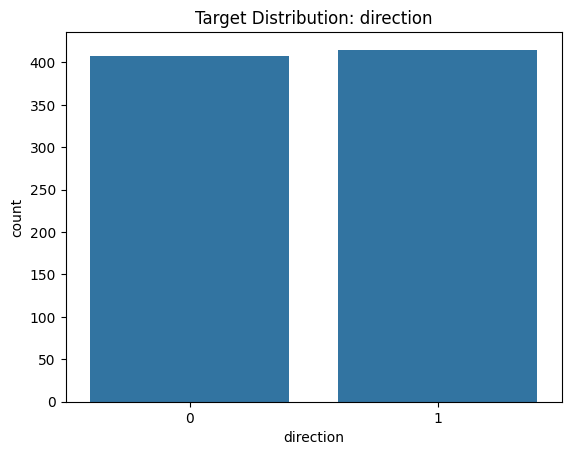

In [5]:
print(df.describe())
print("\nMissing values per column:\n", df.isna().sum())

# Distribution of the target 'direction'
sns.countplot(x='direction', data=df)
plt.title('Target Distribution: direction')
plt.show()

In [6]:
# Use numeric columns only
features = ['open', 'high', 'low', 'close', 'volume', 
            'post_count', 'avg_score', 'total_score', 'avg_comments', 'max_score']

X = df[features]
y = df['direction']  # Classification: 0 or 1 (price goes down/up next day)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)  # shuffle=False preserves timeline

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 658 Test size: 165


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.5454545454545454
Confusion Matrix:
 [[ 2 71]
 [ 4 88]]


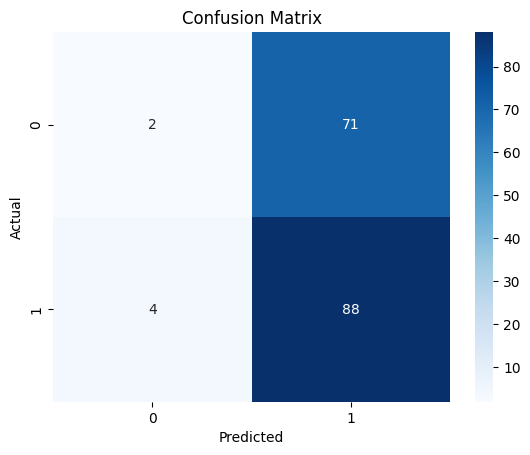

In [9]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.46060606060606063
Confusion Matrix:
 [[35 38]
 [51 41]]
